# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [197]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [198]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet  yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [199]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler

# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [200]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

df_list = []

for filename in all_files:
    # Se carga el archivo
    df = pd.read_parquet(filename)
    # Tomo el 10% del dataset total   
    df = df.sample(frac=0.1)
    # Agrego a la lista
    df_list.append(df)


df = pd.concat(df_list, axis=0, ignore_index=True)


df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555999.000,1571207.000,1555999.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555999.000
mean,1.673,1.501,2.938,1.057,164.473,162.378,1.253,12.613,1.106,0.492,2.193,0.331,0.298,18.558,2.296
std,0.470,1.142,66.929,0.775,65.793,69.968,0.486,11.773,1.256,0.073,2.720,1.817,0.035,14.394,0.707
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-400.000,-7.000,-0.500,-61.910,-40.000,-0.300,-400.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,70137.720,99.000,265.000,265.000,5.000,1718.500,90.060,1.100,500.000,910.500,0.300,1722.300,2.750


In [201]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571207 entries, 0 to 1571206
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1571207 non-null  int64         
 1   tpep_pickup_datetime   1571207 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1571207 non-null  datetime64[ns]
 3   passenger_count        1555999 non-null  float64       
 4   trip_distance          1571207 non-null  float64       
 5   RatecodeID             1555999 non-null  float64       
 6   store_and_fwd_flag     1555999 non-null  object        
 7   PULocationID           1571207 non-null  int64         
 8   DOLocationID           1571207 non-null  int64         
 9   payment_type           1571207 non-null  int64         
 10  fare_amount            1571207 non-null  float64       
 11  extra                  1571207 non-null  float64       
 12  mta_tax                15712

In [202]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555999.000,1571207.000,1555999.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555999.000
mean,1.673,1.501,2.938,1.057,164.473,162.378,1.253,12.613,1.106,0.492,2.193,0.331,0.298,18.558,2.296
std,0.470,1.142,66.929,0.775,65.793,69.968,0.486,11.773,1.256,0.073,2.720,1.817,0.035,14.394,0.707
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-400.000,-7.000,-0.500,-61.910,-40.000,-0.300,-400.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,70137.720,99.000,265.000,265.000,5.000,1718.500,90.060,1.100,500.000,910.500,0.300,1722.300,2.750


### Descripción de Columnas del Dataset.


In [203]:
# Listado de tipos de variables presentes en el dataset
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [204]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}/{col.size}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

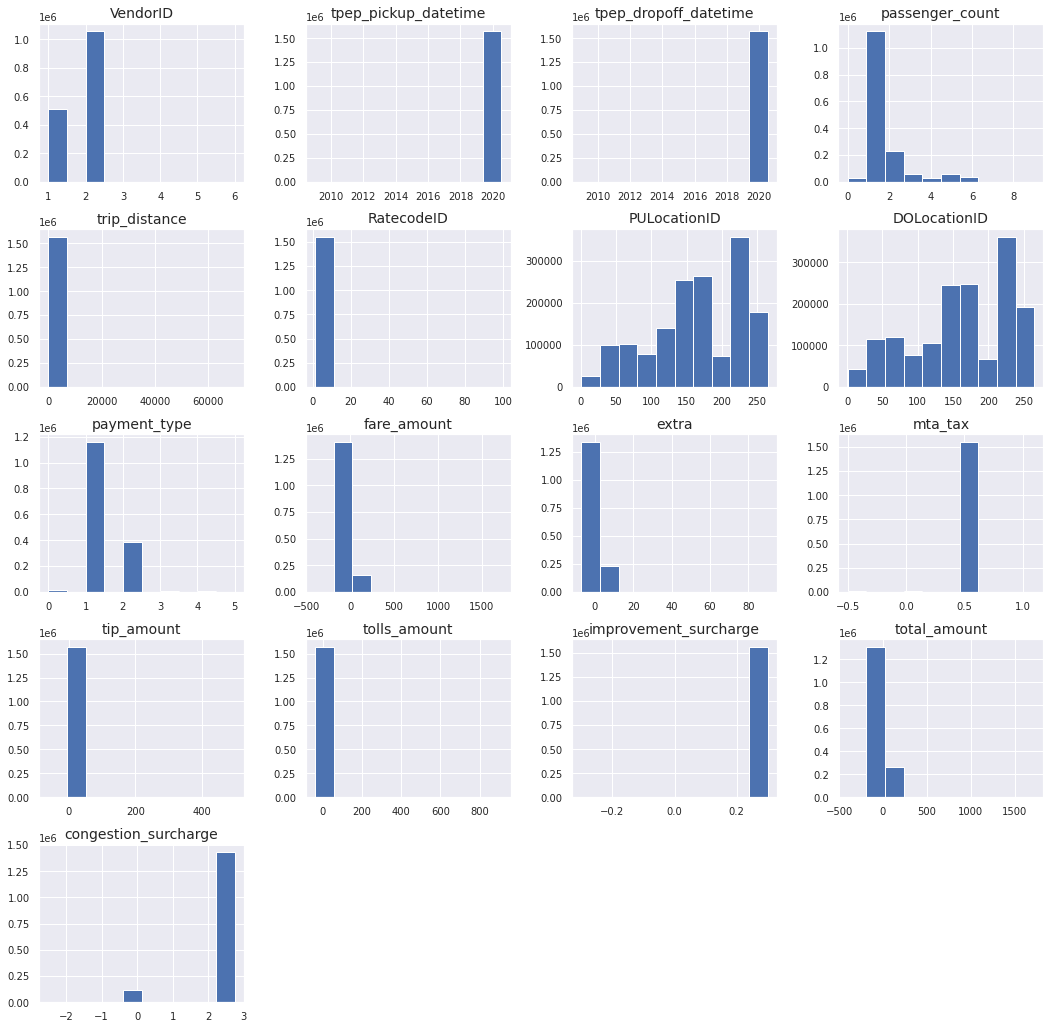

In [205]:
#imprimo distribuciones 
display_dataset_distributions(df)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [206]:
print_categorical(df.VendorID)

Ordinalidad: [2 1 5 6]
Cantidad de nulos: 0/1571207
Ocurrencias:
5          2
6         55
1     514041
2    1057109
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [207]:
print_null_info(df.tpep_pickup_datetime)

Cantidad de nulos: 0/1571207


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [208]:
print_null_info(df.tpep_dropoff_datetime)

Cantidad de nulos: 0/1571207


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [209]:
print_null_info(df.passenger_count)

Cantidad de nulos: 15208/1571207



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [210]:
print_null_info(df.trip_distance)

Cantidad de nulos: 0/1571207


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [211]:
print_categorical(df.PULocationID)

Ordinalidad: [ 75 141  79 237 249 138 142 236 231 229 107  49 170 140 238 164 263  48
  43 239  68 230 261 161 264  85 114 100 186  90 262 162 151 211 129 132
 143  14 234 246 166  13 158 244  33 137 163 233  88 255  87 148   4  10
 144 125  50  45  42  97 113  74  24 232  61 152 145 226 222 193 168 205
   7 256 146 157 259 224 215 102  70 265 260  62 131  66  41 209  22 165
  72 112  25 116  93  77  17 208 188 134 174  16 220 213 179 181  76  28
  54 160 121 257  32  67  63  39 228  52  65  53  78  81  71 216  69  47
  82  40   9 247 223 106  80 235  51 254  55 130 196 185 127  91 243  92
 108 136  12  21 225  83   3 197  95  26 175 147 155 258 195  56  89 252
   1 242 198  29  44  35  38  36 149 171 135  37 122 177 183 218 133 178
 248 212 119 182 203 180 189   5 207 139 156 241 159 150  60 194 117 227
 219 201 101 167 191  73 169  86  98 217 192 111 245 115 202 210 250  84
  94  99  20  15 200 253 153 124  19 126 123  64 128  18 173  34 118 240
   8 214  59  11   6  96  31 190 120  


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [212]:
print_categorical(df.DOLocationID)

Ordinalidad: [151 237   4 236 249 233 107 100 234 211 263 246  48  74 145 164 238  90
  43 166 162 161 141  68 230 264  87 261 137 186 223 140 231 114 262 129
  13 134 163 143 189 239  50 142 229  75  39 158  79  60 113 138 170  97
 224 181 244 228 144  40  95 148 232  65 168 226  80  93 117 265 132  17
  49  88  45 106 125 146 188  33  12  41  66 177 209 193 220  51 159 157
  37  42 255   1 131  70 190   7 257 112  25  24 225 127 179 254  61 152
  69 260 116 256 216 165 160  83  89 196 218 243 194 171  10 123  94 135
 203 133 130 252  55 210 213  56  53  28  86  14  76 126  36 235 120 212
 173  92 200  62 198  82 217 215 219  73  29 241  16 205 169 122  21  78
  47  35 128 102  52 136 191 197 167 195 250  11  54  20 178 182  72 247
  64 174 124 242   9  19  81  91  71  22 119 248 180  58 155  63  31  85
  96 185 108 222   3 101 258  98 202 201  18  77 240  26 175 253 227 139
  32  34 121  23 259  38  15 149 207 192 153  67 183 208   5  84 147 245
 150 111 251   8 184  57  46  99 118  


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [213]:
print_categorical(df.RatecodeID)

Ordinalidad: [ 1. nan  3.  2.  5.  4. 99.  6.]
Cantidad de nulos: 15208/1571207
Ocurrencias:
6.000          11
99.000         77
4.000        1229
3.000        3176
5.000        8810
2.000       35740
1.000     1506956
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [214]:
print_categorical(df.store_and_fwd_flag)

Ordinalidad: ['N' None 'Y']
Cantidad de nulos: 15208/1571207
Ocurrencias:
Y      15998
N    1540001
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [215]:
print_categorical(df.payment_type)

Ordinalidad: [2 1 0 3 4 5]
Cantidad de nulos: 0/1571207
Ocurrencias:
5          1
4       4526
3       8127
0      15208
2     382223
1    1161122
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [216]:
print_null_info(df.fare_amount)

Cantidad de nulos: 0/1571207


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [217]:
print_null_info(df.extra)

Cantidad de nulos: 0/1571207



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [218]:
print_null_info(df.mta_tax)

Cantidad de nulos: 0/1571207


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [219]:
print_null_info(df.improvement_surcharge)

Cantidad de nulos: 0/1571207


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [220]:
print_null_info(df.tip_amount)

Cantidad de nulos: 0/1571207


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [221]:
print_null_info(df.tolls_amount)

Cantidad de nulos: 0/1571207



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [222]:
print_null_info(df.total_amount)

Cantidad de nulos: 0/1571207


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [223]:
print_null_info(df.congestion_surcharge)

Cantidad de nulos: 15208/1571207


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [224]:
print_null_info(df.airport_fee)

Cantidad de nulos: 1571207/1571207


## 2. Limpieza de los datos


### 2.1 Datos faltantes

In [225]:
# verificamos cantidad de items repetidos y los eliminamos
df = df.drop_duplicates()
df.size

29850748

In [226]:
# verificamos cantidad de nulos en cada categoría
for i in range(len(df.columns)):
  col_name = df.columns[i]
  col_data = df[col_name]
  print(f'{col_name}: {col_data.isnull().sum()}/{col_data.size}')

VendorID: 0/1571092
tpep_pickup_datetime: 0/1571092
tpep_dropoff_datetime: 0/1571092
passenger_count: 15093/1571092
trip_distance: 0/1571092
RatecodeID: 15093/1571092
store_and_fwd_flag: 15093/1571092
PULocationID: 0/1571092
DOLocationID: 0/1571092
payment_type: 0/1571092
fare_amount: 0/1571092
extra: 0/1571092
mta_tax: 0/1571092
tip_amount: 0/1571092
tolls_amount: 0/1571092
improvement_surcharge: 0/1571092
total_amount: 0/1571092
congestion_surcharge: 15093/1571092
airport_fee: 1571092/1571092


#### 2.1.1 Análisis de faltantes

Las categorías con faltantes son las siguientes:

* passenger_count: 15180/1571072
* RatecodeID: 15180/1571072
* store_and_fwd_flag: 15180/1571072
* congestion_surcharge: 15180/1571072
* airport_fee: 1571072/1571072

Para cada una de estas columnas se decide:
* __passenger_count__ es ingresado a mano por lo que los datos faltantes suponemos que corresponden a fallas en la carga por parte del conductor. Se decide eliminar los faltantes dado que representan el 1%
* __RatecodeID__ no aporta información por lo que se elimina esta feature
* __store_and_fwd_flag__ no aporta información por lo que se elimina esta feature
* __congestion_surcharge__ : los faltantes representan el 1% por lo que se quitan
* __airport_fee__ se quita ya que todos los valores son nulos


In [227]:
# descarto datos nulos de los features con interés (passenger count y congestion_surcharge)
df = df.dropna(subset=['passenger_count', 'congestion_surcharge'])
len(df['passenger_count'])

1555999

#### 2.1.2 Datos no nulos inválidos

En algunos features se detectan valores fuera del rango esperado (tal como valores negativos o fuera del rango de las categorías definidas)

In [228]:
# verificamos cantidad de negativos en las categorías numéricas
cols_to_check = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

for i, col in enumerate(cols_to_check):
  col_data = df[col]
  print(f'{col}: {col_data[col_data < 0].count()}/{col_data.size}')
  

trip_distance: 0/1555999
fare_amount: 4984/1555999
extra: 2363/1555999
mta_tax: 4880/1555999
tip_amount: 44/1555999
tolls_amount: 115/1555999
improvement_surcharge: 4984/1555999
total_amount: 4984/1555999
congestion_surcharge: 3968/1555999


In [229]:
# trip distance: borro <= 0
df = df[(df['trip_distance'] > 0)]
# fare_amount: borro < 0
df = df[(df['fare_amount'] >= 0)]
# extra: borro < 0
df = df[(df['extra'] >= 0)]
# mta_tax: borro < 0
df = df[(df['mta_tax'] >= 0)]
# tip_amount: borro < 0
df = df[(df['tip_amount'] >= 0)]
#tolls amount: borro < 0
df = df[(df['tolls_amount'] >= 0)]
#improvement_surcharge: borro < 0
df = df[(df['improvement_surcharge'] >= 0)]
#total_amount: borro < 0
df = df[(df['total_amount'] >= 0)]
#congestion_surcharge: borro < 0
df = df[(df['congestion_surcharge'] >= 0)]

len(df)



1535503

#### 2.1.3 Filtro entradas por tipo de pago
Descarto otros pagos diferenes de CREDIT (payment_type = 1)

In [230]:
df = df[df["payment_type"] == 1]
len(df)


1151139

#### 2.1.3 Eliminación de variables con baja varianza

In [231]:
# TODO

### 2.2 Ingeniería de datos

#### 2.2.1 Features de tiempo y hora del día

In [232]:
# generamos una nueva columna "duration" con el tiempo de viaje
ts_init = pd.to_datetime(df['tpep_pickup_datetime']).values.astype(np.int64) / 1000000000
ts_end = pd.to_datetime(df['tpep_dropoff_datetime']).values.astype(np.int64) / 1000000000
duration = ts_end - ts_init
df['duration'] = duration

# ademas creamos 3 categorías para el horario en que se inició el viaje: diurno, vespertino y nocturno
MORNING_START = 6
MORNING_END = 13
AFTERNOON_START = 14
AFTERNOON_END = 20
EVENING_START = 21
EVENING_END = 5 

day_interval = df['tpep_pickup_datetime'].dt.hour
df['morning'] = pd.cut(day_interval, bins=[-float('Inf'), MORNING_START - 1, MORNING_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['afternoon'] = pd.cut(day_interval, bins=[-float('Inf'), AFTERNOON_START - 1, AFTERNOON_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['evening'] = pd.cut(day_interval, bins=[-float('Inf'), 0, EVENING_END, EVENING_START, 23, float('Inf')], labels=[0, 1, 0, 1, 0], ordered=False)

# reviso que sean validas 
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

(0, 0, 0)

In [233]:
# termino de borrar todos los negativos
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

# verifico si tengo entradas con duration < 0
duration_invalid = df[df['duration'] < 0]['duration'].count()
print(f'Duraciones inválidas: {duration_invalid}')

Duraciones inválidas: 1


#### 2.2.2 Codificación del origen y destino

In [234]:
# definimos el umbral mínimo de cantidad de viajes para podar las categorías PULocationID y DOLocationID.
location_id_min_th_count = 0.01
total_items = len(df['PULocationID'])

# convertimos PULocationID usando frequency encoding y me quedo con los que representan al menos 1%
pulocation_id_freq_map = (df['PULocationID'].value_counts(sort=True) / total_items).to_dict()
df['PULocationIDFreq'] = df['PULocationID'].apply(lambda x: pulocation_id_freq_map[x])
# convertimos DOLocationID
dolocation_id_freq_map = (df['DOLocationID'].value_counts(sort=True) / total_items).to_dict()
df['DOLocationIDFreq'] = df['DOLocationID'].apply(lambda x: dolocation_id_freq_map[x])

#pongo en 0 todas las categorías con menor frecuencia que <location_id_min_th_count>
def clear_location_low_values(x, th):
  if x <= th:
    return 0
  return x

df['PULocationIDFreq'] = df['PULocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
df['DOLocationIDFreq'] = df['DOLocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))


#### 2.2.3 Balance de la variable de salida

In [235]:
#verifico el rango de los ids
df['DOLocationID'].min(), df['DOLocationID'].max()


(1, 265)

In [236]:
#asigno a la categoria 0 a todos los que aparecen por debajo del 1%
location_id_min_th_count = 0.01 * len(df)
df['DOLocationIDTruncated'] = df['DOLocationID'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
df['DOLocationIDTruncated'].values[:10], location_id_min_th_count


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11511.39)

In [237]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,PULocationIDFreq,DOLocationIDFreq,DOLocationIDTruncated
count,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000,1151139.000
mean,1.670,1.494,2.866,1.040,166.104,164.038,1.000,12.457,1.132,0.498,2.950,0.341,0.300,19.276,2.378,949.195,0.024,0.020,0.000
std,0.470,1.140,3.677,0.298,65.258,69.309,0.000,10.941,1.254,0.031,2.685,1.684,0.003,14.062,0.538,3573.600,0.013,0.013,0.000
min,1.000,0.000,0.010,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-166222.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,132.000,113.000,1.000,6.500,0.000,0.500,1.750,0.000,0.300,11.800,2.500,400.000,0.018,0.012,0.000
50%,2.000,1.000,1.650,1.000,162.000,162.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500,645.000,0.024,0.021,0.000
75%,2.000,2.000,2.910,1.000,234.000,234.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.350,2.500,1021.000,0.033,0.028,0.000
max,2.000,9.000,156.670,99.000,265.000,265.000,1.000,433.000,33.750,0.500,500.000,600.040,0.300,846.590,2.750,86385.000,0.046,0.047,0.000


### 2.3 Selección final de las features

En base al procesamiento anterior, seleccionamos los siguientes features del dataset:

In [248]:

feature_cols = [
  'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
  'mta_tax', 'tip_amount', 'tolls_amount', 
  'improvement_surcharge', 'total_amount', 
  'congestion_surcharge', 'duration', 'PULocationIDFreq',
  'morning', 'afternoon', 'evening']
# target_col = ['DOLocationID']

X = df[feature_cols]
y = df['DOLocationIDTruncated']

In [249]:
y.shape

(1151139,)

#### 2.3.1 Selección de features con el coeficiente de Kendall

El coeficiente de Kendall permite analizar la correlación entre variables numéricas de entrada y una variable de salida categórica (DOLocationID). 
- Test de correlación de Kendall: 
    - Test no paramétrico, i.e. no asume ninguna distribución de los datos
    - $H_0$: Las variables son independientes, $H_1$: Las variables no son independientes.
    - Se basa en el estadístico $\tau = {\frac {2}{n(n-1)}}\sum _{i<j}{sgn}(x_{i}-x_{j}){sgn}(y_{i}-y_{j})$ 
    - Orden $n^2$, si hay muchos datos puede ser muy costoso.

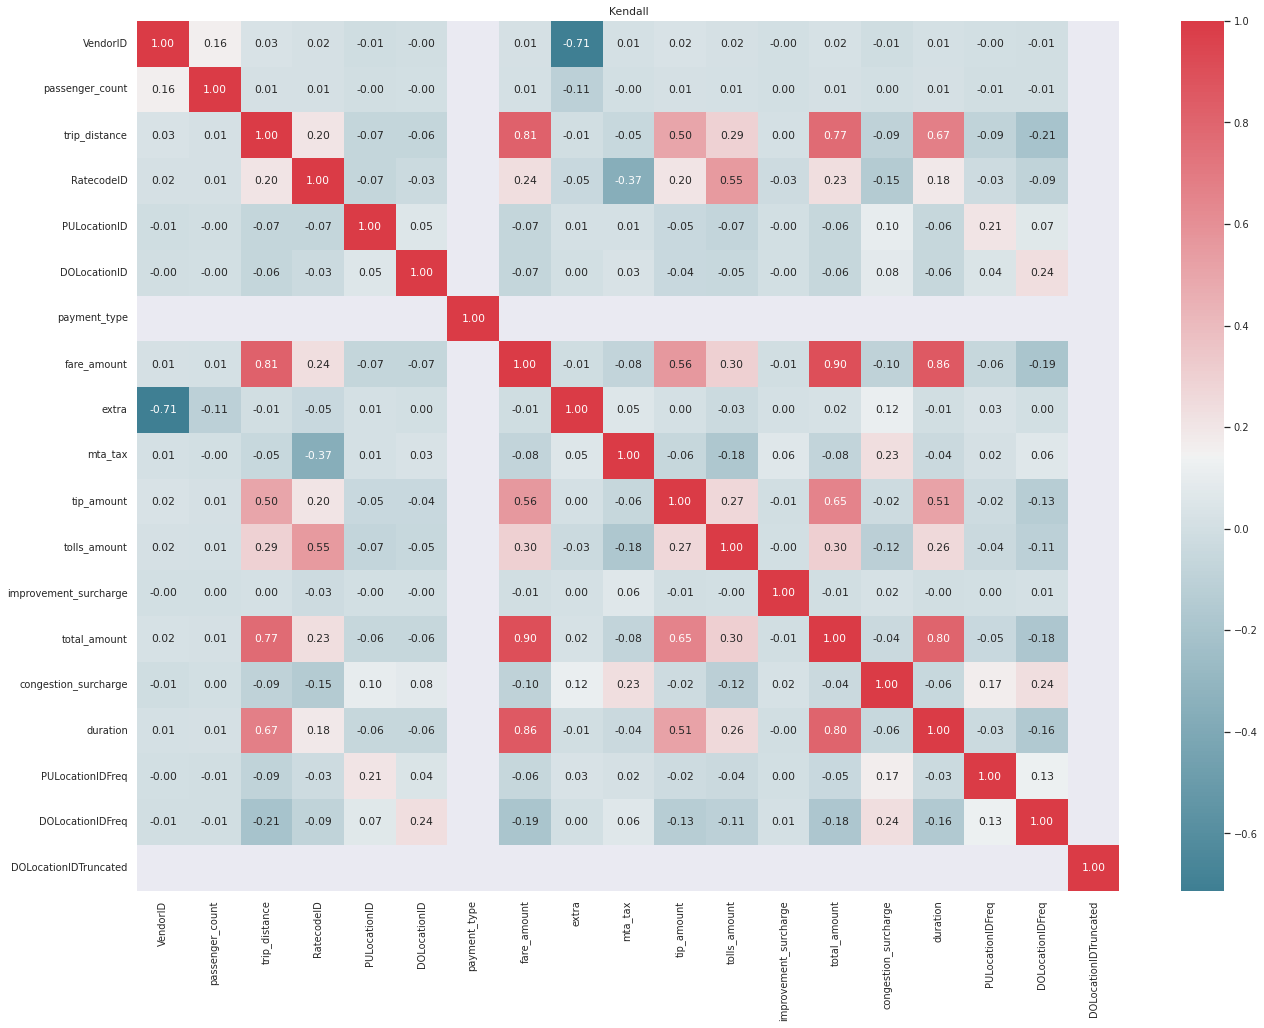

In [250]:
fig, axes = plt.subplots(1,1,figsize=(22,16))

tau = df.corr(method='kendall')
axes.set_title("Kendall")
sns.heatmap(tau, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

__Conclusión__:  
Se detectan correlaciones fuertes (superior al 75%) entre los siguientes features:
fare_amount - trip_distance (0.81)
total_amount - trip_distance (0.77)
total_amount - fare_amount (0.90)
duration - fare_amount (0.86)
duration - total_amount (0.80)

Se concluye que podría llegar a seleccionarse entre total_amount y fare_amount en lugar de avanzar con ambas dada su alto grado de correlación

## 3.Entrenamiento de modelos 
### 3.1 Separación de datos


In [264]:
# Particionamos en train y test
train_ratio = 0.7
test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)


In [265]:
#imprimo tamaños de los dataset de train y test
print(f'train size={X_train.shape}')
print(f'test size={X_test.shape}')

train size=(863354, 15)
test size=(287785, 15)


### 3.2 Random Forest

In [253]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
total_trees = 100 # number of trees
max_depth = 2

rf = RandomForestClassifier(n_estimators = total_trees, max_depth = max_depth, random_state=0)

In [258]:
# rf.fit(X_train, y_train.values.reshape(-1))
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [259]:

# Utilizamos el método de predicción en los datos de prueba
y_rf_pred = rf.predict(X_test)

In [260]:
print(classification_report(y_test,y_rf_pred))
print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_rf_pred),4))
# rf_precision, rf_recall, rf_threshold=precision_recall_curve(y_test, y_rf_pred)
# print('Area bajo la curva Precision-Recall:',np.round(auc(rf_recall,rf_precision),4))
# plot_confusion_matrix(rf, X_test, y_test,cmap='Blues')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    287785

    accuracy                           1.00    287785
   macro avg       1.00      1.00      1.00    287785
weighted avg       1.00      1.00      1.00    287785



ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

### 3.3 Regresión logística

In [266]:
def logistic_regression_report(X_train,X_test,y_train,y_test):
    
    scaler=StandardScaler()  
    
    X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
    X_test_sc=scaler.transform(X_test)
        
    model=LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    y_proba=model.predict_proba(X_test_sc)
    
    print(classification_report(y_test,y_pred))    
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))    
    precision, recall,threshold=precision_recall_curve(y_test,y_proba[:,1])
    print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))
    print(f'Precision:{precision}, Recall: {recall}:')
    plot_confusion_matrix(model,X_test_sc,y_test,cmap='Blues')

In [267]:
#corremos el modelo de regresión lineal
logistic_regression_report(X_train, X_test, y_train, y_test)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [284]:
#logistic_regression_report(X_train, X_test, y_train, y_test)
scaler = StandardScaler()  
X_train_sc = scaler.fit_transform(X_train) # Estandarizamos los datos     
X_test_sc = scaler.transform(X_test)
df['DOLocationIDTruncated'].unique()

array([0])

In [276]:

lr = LogisticRegression(random_state = 1)
lr.fit(X_train_sc,y_train)
y_lr_pred = lr.predict(X_test_sc)
lr_precision, lr_recall, lr_threshold=precision_recall_curve(y_test,y_lr_pred)

lr_precision, lr_recall, lr_threshold

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
lr_precision

# TODO - Falta terminar

1. Aplicar filtrado Kendall para analizar las variables de entrada con respecto a la de salida
2. Analizar variables con poca varianza
3. Quedarse con las 10 Locations mas importantes de Pick Up y Drop Off y todas las otras meterlas en un id 0 (others)
4. Correr Random Forest y Linear regression. Obtener los feature importance.
5. Ejecutar pyCaret para ver en que concluye el automl